In [2]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import argparse
import matplotlib.colors as mcolors
import warnings
import cartopy.feature as cfeature

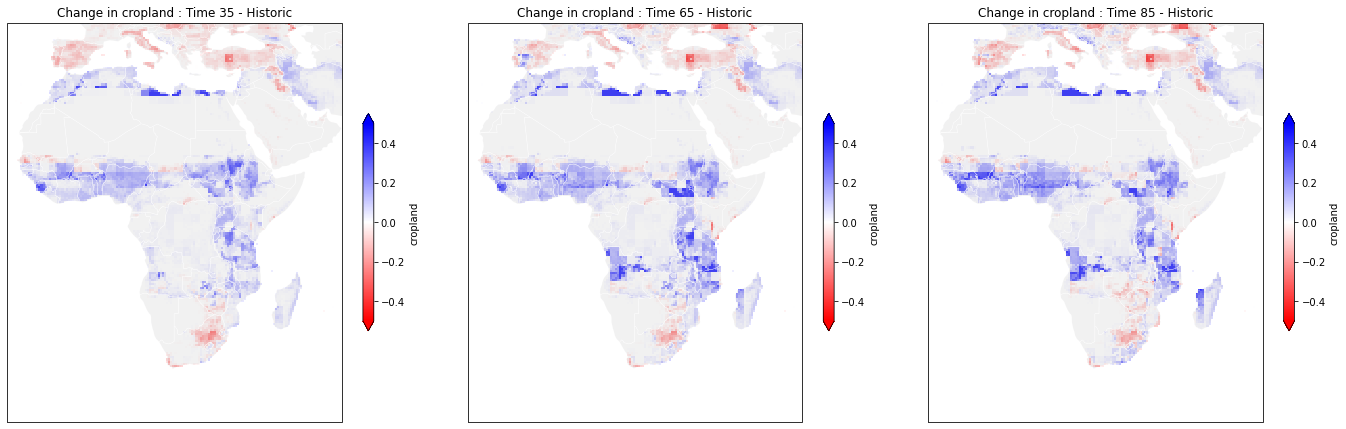

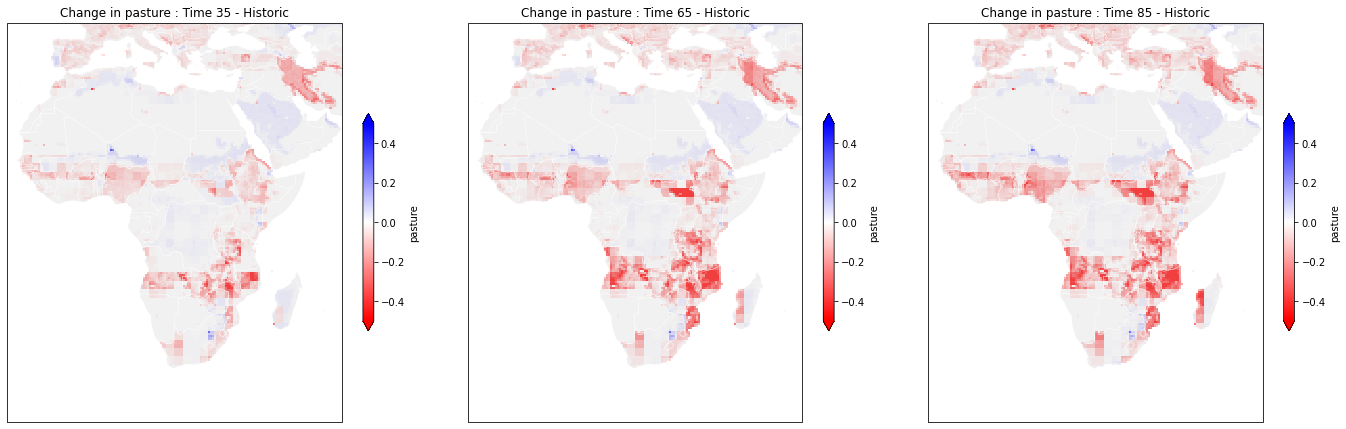

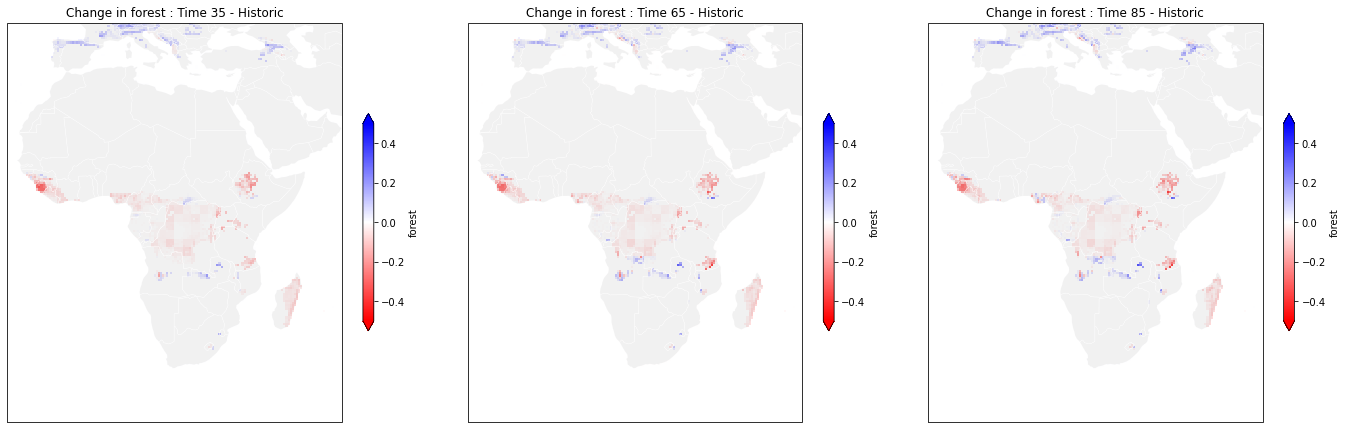

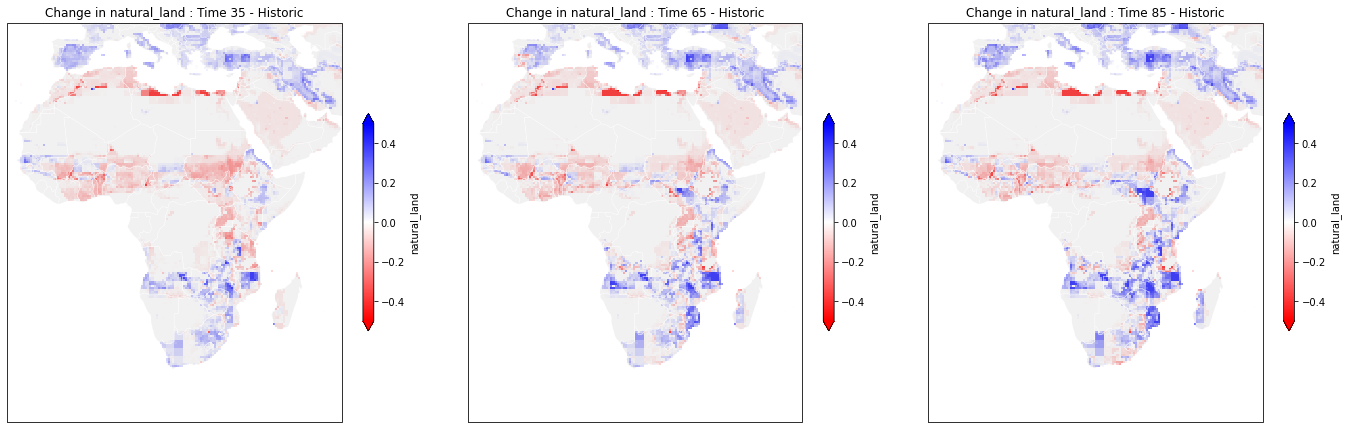

In [3]:

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [35, 65, 85]

# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes[i]
        # Compute the difference between the future and the historical data
        difference = sum_over_categories[category].isel(time=i) - da_historic[category]
        im = difference.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='bwr_r', ax=ax, vmin=-0.5, vmax=0.5, cbar_kwargs={'shrink': 0.5})
        countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.set_title(f"Change in {category} : Time {time} - Historic")
        ax.set_extent((-20, 60, -40, 40))
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
    plt.show()


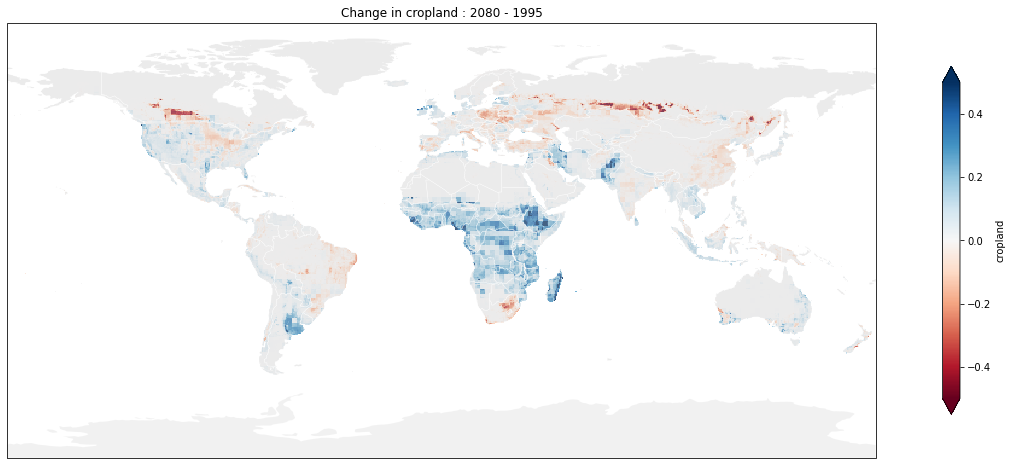

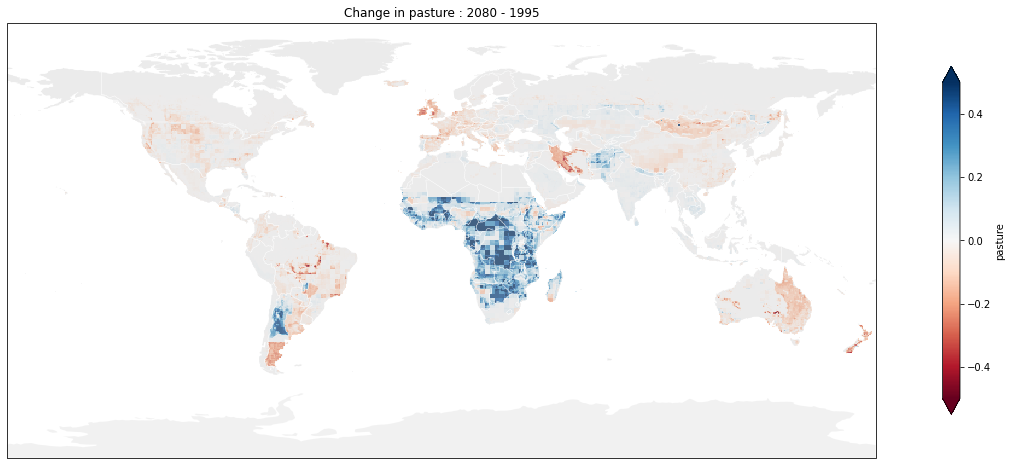

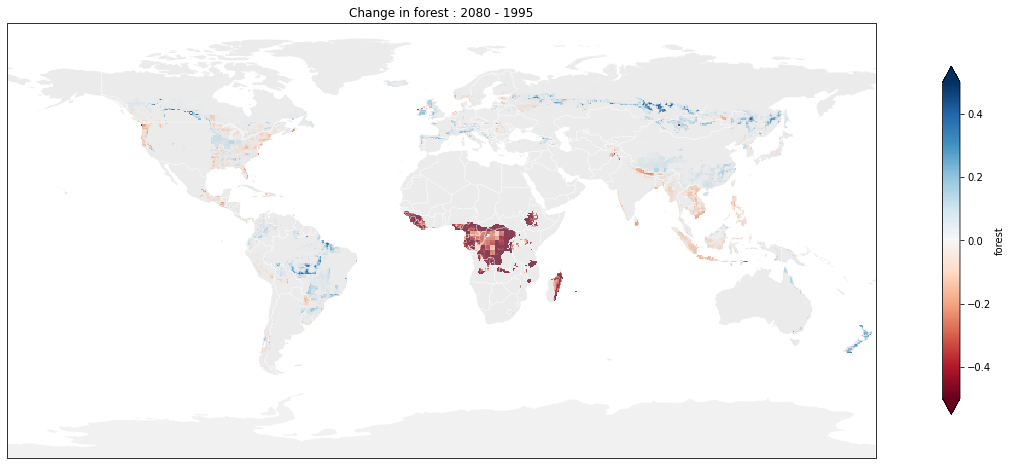

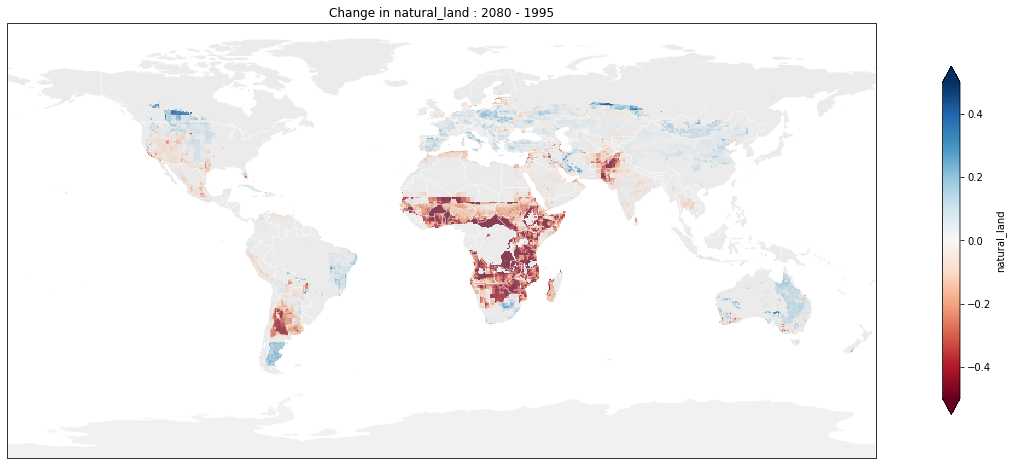

In [3]:

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp460.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[65])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [65]

# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes
        # Compute the difference between the future and the historical data
        difference = sum_over_categories[category].isel(time=i) - da_historic[category]
        im = difference.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='RdBu', ax=ax, vmin=-0.5, vmax=0.5, cbar_kwargs={'shrink': 0.8})
        countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.set_title(f"Change in {category} : 2080 - 1995")
        #ax.set_extent((-20, 60, -40, 40))
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
    plt.show()
    
